<p style="text-align:center;">
  <img src="https://media.licdn.com/dms/image/v2/D5612AQHrwwP1YaEBLg/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1721190513121?e=2147483647&v=beta&t=7pR8UpwQU9MFp2Bb0wILO_hacjIZ_x2cwgR7Z4VcP68" width="650">
</p>

<h1 style="text-align:center; font-weight:700;">
 ✈️AIRLINE REVIEW ANALYSIS
</h1>

<h3 style="text-align:center; font-size:22px; font-weight:400; color:#555;">
Understanding Passenger Satisfaction & Recommendation Patterns 
</h3>

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
INTRODUCTION
</h2>

 Air travel has become one of the most widely used modes of transportation, connecting people and businesses across the world. With increasing competition among airlines, passenger satisfaction has become a major factor that determines the success and reputation of an airline. Understanding customer opinions helps airlines identify their strengths, address service gaps, and improve the overall travel experience.
</div>

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
OBJECTIVES
</h2>

- Load and explore the dataset

- Clean and preprocess data

- Perform univariate, bivariate, and multivariate visualizations

- Interpret each visualization and code output

- Provide insights and recommendations

- Summarize the findings in a conclusion

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
PROBLEM STATEMENT
</h2>

This project examines airline review data to understand how different service features—such as comfort, staff service, food, entertainment, and WiFi—affect passenger satisfaction. The aim is to uncover insights that help airlines improve overall travel experience.

## 📂 Data Loading 

In [2]:
# IMPORT LIBRARIES

#for Data handling
import pandas as pd  # for data loading,cleaning and manipulation
import numpy as np  # for numerical operations

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

review_df = pd.read_csv("Airline_review.csv")  # use dataframe name
#review_df.info()

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [20]:
# check the number of datas

print(review_df.shape)


(23171, 20)


In [21]:
# check columns, rows and datatype

df = pd.read_csv("Airline_review.csv")
print(df.shape)
df.info()
df.head() 

(23171, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [7]:
# Data types
print("=== DATA TYPES OF EACH COLUMN ===")
print(review_df.dtypes)

# Data info
print("\n=== DATASET INFO ===")
print(review_df.info())

# Statical description
print("\n=== NUMERICAL SUMMARY ===")
print(review_df.describe())

# Describe all columns
print("\n=== FULL SUMMARY INCLUDING TEXT COLUMNS ===")
print(review_df.describe(include='all'))


=== DATA TYPES OF EACH COLUMN ===
Unnamed: 0                  int64
Airline Name               object
Overall_Rating             object
Review_Title               object
Review Date                object
Verified                     bool
Review                     object
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                object
dtype: object

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 

In [23]:
review_df.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

## 🔧 Data Pre-processing

In [24]:
## Check  Missing Values

print(review_df.isnull().sum())

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


In [6]:
# Fill missing text columns

text_cols = review_df.select_dtypes(include=['object']).columns
for col in text_cols:
    review_df[col] = review_df[col].fillna("Missing")

In [8]:
# Remove duplicates

review_df.duplicated().sum()  
df=review_df.drop_duplicates().reset_index(drop=True)
df[df.duplicated()]


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended


In [27]:
# Standardize Column Names

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w_]", "", regex=True)
df.columns

Index(['unnamed_0', 'airline_name', 'overall_rating', 'review_title',
       'review_date', 'verified', 'review', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food__beverages', 'ground_service',
       'inflight_entertainment', 'wifi__connectivity', 'value_for_money',
       'recommended'],
      dtype='object')

In [28]:
# Check how many null values
df.isnull().sum()

unnamed_0                     0
airline_name                  0
overall_rating                0
review_title                  0
review_date                   0
verified                      0
review                        0
aircraft                  16042
type_of_traveller          3738
seat_type                  1096
route                      3828
date_flown                 3754
seat_comfort               4155
cabin_staff_service        4260
food__beverages            8671
ground_service             4793
inflight_entertainment    12342
wifi__connectivity        17251
value_for_money            1066
recommended                   0
dtype: int64

In [29]:
print(review_df.columns)

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')


In [30]:
#  Removes any unwanted Unicode characters, symbols, emojis, or non-ASCII text.

mask = df.apply(lambda col: col.astype(str).str.contains(r'[^\x00-\x7F]', regex=True))
rows_with_unicode = df[mask.any(axis=1)]

In [31]:
import re
def remove_unicode(df):

    def clean_value(x):
        if pd.isna(x):
            return x
        x = str(x)
       
# Keep only ASCII characters (0–127)
        
        x = re.sub(r'[^\x00-\x7F]+', '', x)
        return x

    return df.applymap(clean_value)

In [32]:
review_df = remove_unicode(review_df)

In [33]:
rows_with_unicode

,unnamed_0,airline_name,overall_rating,review_title,review_date,verified,review,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food__beverages,ground_service,inflight_entertainment,wifi__connectivity,value_for_money,recommended
6,6,Adria Airways,1,"""worse than the budget airlines""",6th September 2019,False,"Ljubljana to Zürich. Firstly, Ljubljana airp...",NaN,Business,Economy Class,Ljubljana to Zürich,September 2019,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no
8,8,Adria Airways,1,"""combined two flights""",6th August 2019,True,Worst Airline ever! They combined two flight...,NaN,Solo Leisure,Economy Class,Pristina to Zürich via Ljubliana,August 2019,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no
9,9,Adria Airways,8,"""the crew was nice""",12th October 2018,True,Ljubljana to Munich. The homebase airport of ...,NaN,Family Leisure,Economy Class,Ljubljana to Munich,October 2018,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes
95,95,Aegean Airlines,1,"""We expected meaningful compensation""",19th July 2023,True,I had a flight me and my husband from Stockh...,NaN,Couple Leisure,Economy Class,Stockholm to Cairo via Athens,June 2023,3.0,1.0,3.0,1.0,NaN,NaN,1.0,no
96,96,Aegean Airlines,4,"""Very poor customer service""",17th July 2023,True,Very poor customer service. I am travelling w...,NaN,Family Leisure,Economy Class,Athens to Brussels,May 2023,2.0,3.0,3.0,2.0,1.0,NaN,2.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23163,23163,ZIPAIR,1,"""need a Japanese citizenship to transfer""",27th July 2022,True,Got to the Zipair check in desk and they ref...,NaN,Solo Leisure,Economy Class,Los Angeles to Seoul via Tokyo Narita,July 2022,NaN,NaN,NaN,2.0,NaN,NaN,1.0,no
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no


In [34]:
def clean_dataframe(df):

    def clean_value(x):
        # Keep NaN values untouched
        if pd.isna(x):
            return x
        
        # Convert to string
        x = str(x)

        # Remove HTML tags
        x = re.sub(r'<.*?>', '', x)

        # Strip leading/trailing spaces
        x = x.strip()

        # Replace multiple spaces with single space
        x = re.sub(r'\s{2,}', ' ', x)

        return x

    # Apply cleaning element-wise
    return df.applymap(clean_value)

In [35]:
df = clean_dataframe(df)

### 🔹Insights
This identifies all text-based columns (dtype = object) in the dataset.
Any missing entries in these text columns are filled with the label "Missing".
This ensures:
Consistency in text dataInsights
This step performs comprehensive text cleaning across the dataset by:
Removing Unicode characters
Eliminating punctuation
Normalizing spaces
Standardizing text formatting
Ensuring cleaner, machine-readable text
This significantly improves the quality of the reviews data and prepares it for accurate sentiment analysis, vectorization, and model building.


In [36]:
def clean_dates(series):
    # Remove ordinal suffixes from dates
    series = series.str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
    
    # Convert to  standard datetime format
    return pd.to_datetime(series, format='%d %B %Y', errors='coerce')

In [37]:
df['review_date'] = clean_dates(df['review_date']) # review date cleaned successfully

In [38]:
# Replacing unknown aircraft type

df['aircraft'] = df['aircraft'].replace('unknown','Unknown') 

In [39]:
df.isnull().sum()

unnamed_0                     0
airline_name                  0
overall_rating                0
review_title                  0
review_date                   0
verified                      0
review                        0
aircraft                  16042
type_of_traveller          3738
seat_type                  1096
route                      3828
date_flown                 3754
seat_comfort               4155
cabin_staff_service        4260
food__beverages            8671
ground_service             4793
inflight_entertainment    12342
wifi__connectivity        17251
value_for_money            1066
recommended                   0
dtype: int64

In [40]:
# Convert the dateflown column into proper datetime format
df['date_flown'] = pd.to_datetime(df['date_flown'], dayfirst=True,errors = "coerce") 

In [41]:
import csv

In [42]:
df[df['aircraft']=='-'] # to include rows where the aircraft column contain the value '-' is used to indicate missing data

,unnamed_0,airline_name,overall_rating,review_title,review_date,verified,review,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food__beverages,ground_service,inflight_entertainment,wifi__connectivity,value_for_money,recommended
11731,11731,ITA Airways,1,"""Extremely expensive and inflexible""",2023-02-17,True,Extremely expensive and inflexible airline. I ...,-,Solo Leisure,Economy Class,Milan to London City,2023-02-01,3.0,3.0,2.0,3.0,NaN,NaN,1.0,no
21957,21957,Vistara,1,"""appreciate these kind efforts""",2023-05-17,True,I recently took a trip to Srinagar and on my w...,-,Couple Leisure,Economy Class,SXR to MUM via DEL,2023-05-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes


In [43]:
df.loc[df['aircraft'] == '-', 'aircraft'] = 'Missing'

In [44]:
df.to_csv('Airline_reviews.csv',index=False,quoting=csv.QUOTE_ALL)

## 🔎 Exploratory Data Analysis(EDA)
### 📊 UNIVARIATE ANALYSIS 

print("\n=== Univariate Analysis ===")
print(review_df.describe(include='all'))


In [3]:
# Value counts for categorical columns

for col in review_df.select_dtypes(include='object'):
    print(f"\nValue counts for {col}:")
    print(review_df[col].value_counts())



Value counts for Airline Name:
Airline Name
Caribbean Airlines           100
GoAir                        100
Germanwings                  100
Philippine Airlines          100
Bangkok Airways              100
                            ... 
JC International Airlines      1
MEGA Maldives Airlines         1
MAYAir                         1
Tibet Airlines                 1
Dimonim Air                    1
Name: count, Length: 497, dtype: int64

Value counts for Overall_Rating:
Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1193
4      859
n      842
5      830
6      675
Name: count, dtype: int64

Value counts for Review_Title:
Review_Title
Onur Air customer review                  84
US Airways customer review                75
Germanwings customer review               74
Meridiana customer review                 71
CityJet customer review                   68
                                          ..
"I will not fly Delta again"               1
"could n

### 🔹Insights
- Identifies dominant categories
- Detects category imbalance
- Finds data quality issues
- Helps decidenext analysis steps
- Useful for visualizations

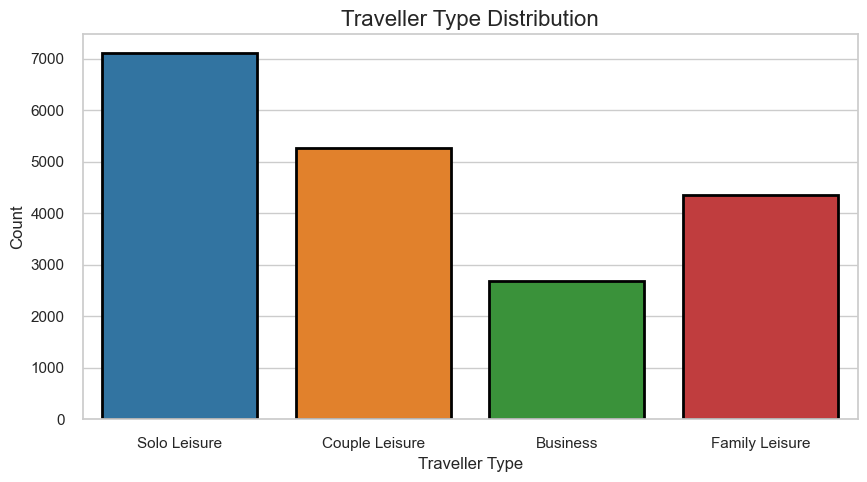

In [64]:
# countplot(Traveller type distribution)

plt.figure(figsize=(10,5))

# Shadow layer
sns.countplot(data=review_df, x="Type Of Traveller",
              color="gray", alpha=0.4)

# Main layer slightly shifted up
sns.countplot(data=review_df, x="Type Of Traveller",
              palette="tab10", 
              edgecolor="black",
              linewidth=2)

plt.title("Traveller Type Distribution", fontsize=16)
plt.xlabel("Traveller Type")
plt.ylabel("Count")

plt.show()

### 🔹Insights
- The chart shows the number of reviews from each traveller type.
- Traveller groups with higher counts indicate the dominant reviewers in your dataset.
- Lower bars suggest traveller types that are less represented.
- Useful for understanding which traveller categories (e.g., Solo, Family, Business, Couples) contribute most to the feedback and overall ratings.

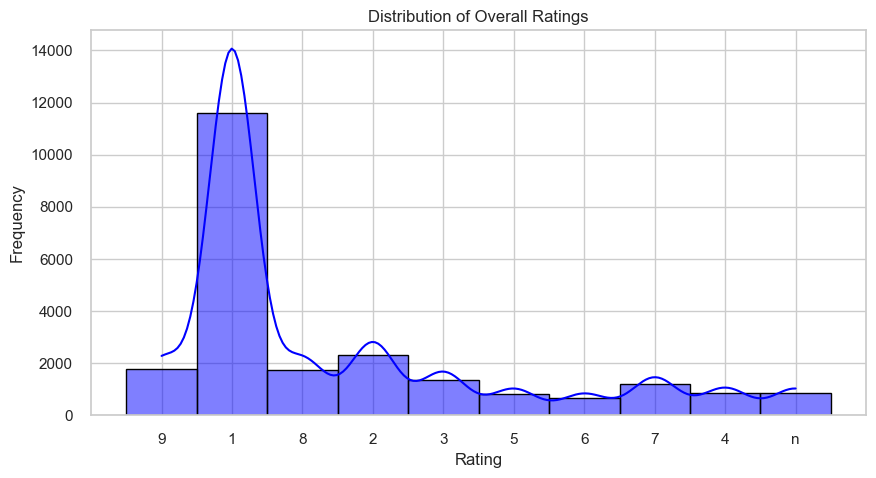

In [47]:
# histplot(Distribution of overall rating)

plt.figure(figsize=(10,5))
sns.histplot(review_df["Overall_Rating"], bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### 🔹 Insights
- The histogram shows how overall ratings are distributed across all reviews.
- If the curve peaks around a certain rating (e.g., 3–4), it means most passengers give moderate to good ratings.
- A wider spread indicates varied customer experiences, while a narrow peak suggests consistent satisfaction.
- The KDE curve helps visualize whether the rating trend is skewed, balanced, or bi-modal.

### 📊 BIVARIATE ANALYSIS

In [48]:
# Average Rating for Each Airline

review_df["Overall_Rating"] = pd.to_numeric(review_df["Overall_Rating"], errors='coerce')
review_df.groupby("Airline Name")["Overall_Rating"].mean()
airline_rating = review_df.groupby("Airline Name", as_index=False)["Overall_Rating"].mean()
print("\nAverage Rating for Each Airline:")
print(airline_rating)



Average Rating for Each Airline:
               Airline Name  Overall_Rating
0               AB Aviation        3.666667
1    ANA All Nippon Airways        3.750000
2             ASKY Airlines        2.363636
3              ATA Airlines        1.500000
4             Adria Airways        4.797297
..                      ...             ...
492    euroAtlantic Airways        2.062500
493                 fastjet        2.878788
494                flyadeal        1.894737
495                   flybe        1.250000
496                flydubai        1.650000

[497 rows x 2 columns]


In [49]:
review_df["Overall_Rating"].dtype

dtype('float64')

### 🔹 Insights
- This table shows the average Overall Rating given to each airline.
- Airlines with higher mean ratings have better customer satisfaction across reviews.
- Airlines with lower average ratings may need improvement in service quality, comfort, or onboard experience.
- Helps quickly identify top-performing vs underperforming airlines in your dataset.

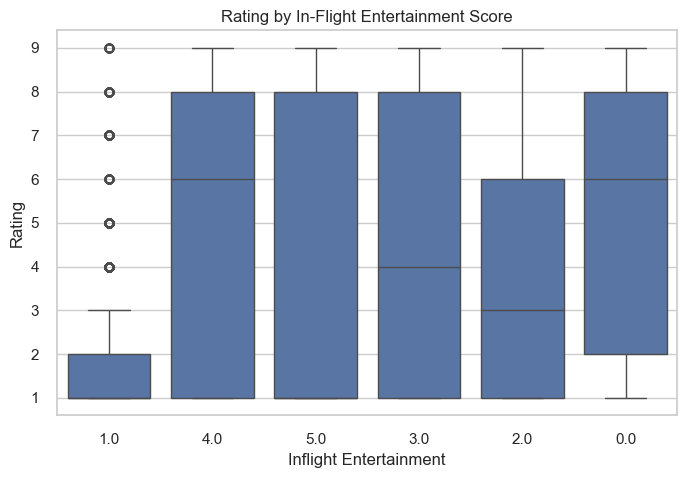

In [63]:
# Boxplot

plt.figure(figsize=(8,5))
sns.boxplot(data=review_df, x='Inflight Entertainment', y='Overall_Rating')
plt.title("Rating by In-Flight Entertainment Score")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Rating")
plt.show()

### 🔹Insights
- As the Inflight Entertainment score increases, the Overall Rating generally increases.
- Lower entertainment scores show large variation and more low ratings.
- Higher scores (4–5) show higher median ratings and less spread, meaning passengers with good entertainment service tend to give consistently better      ratings.
- Indicates strong positive impact of entertainment quality on overall customer satisfaction.

### 📊 MULTIVARIATE ANALYSIS 

In [51]:
print("\n=== Correlation Matrix ===")
numeric_df = review_df.select_dtypes(include=np.number)
corr = numeric_df.corr()
print(corr)



=== Correlation Matrix ===
                Overall_Rating
Overall_Rating             1.0


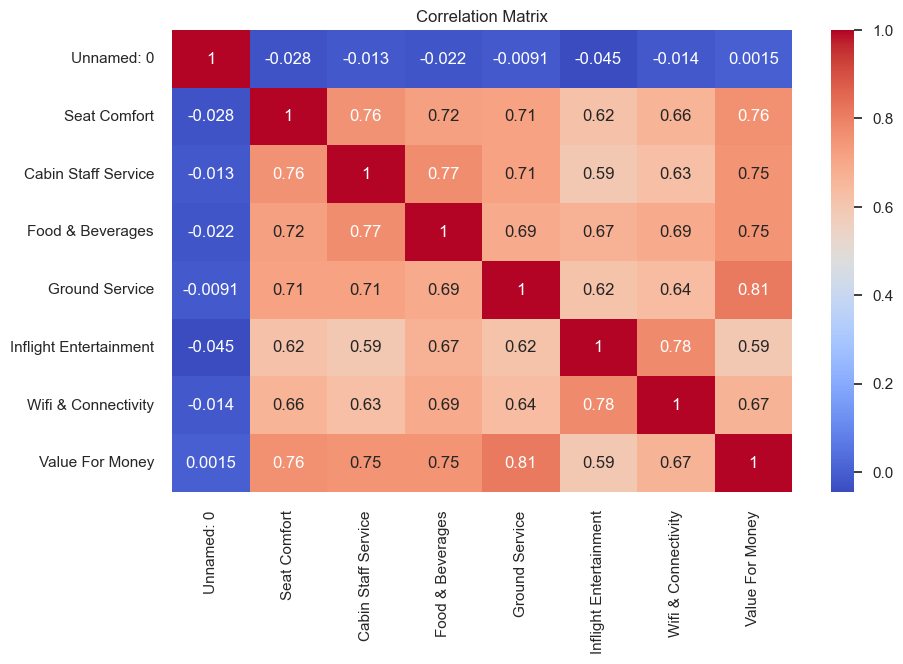

In [4]:
#  CORRELATION HEATMAP 

num_cols = review_df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 🔹Insights
- Shows how strongly each numerical feature is related to others.
- Higher positive values (closer to +1) → strong direct relationship.
- Higher negative values (closer to –1) → strong inverse relationship.
- Values near 0 → little or no correlation.
- Helps identify which factors may influence overall rating, such as seat comfort, cabin staff, food, WiFi, or value for money.
- Useful for selecting important features for modelling or deeper analysis.

In [53]:
# PIVOT TABLE( To find average rating for each airline)

pivot = pd.pivot_table(review_df,index="Airline Name", values="Overall_Rating",aggfunc="mean")
print(pivot)

                        Overall_Rating
Airline Name                          
AB Aviation                   3.666667
ANA All Nippon Airways        3.750000
ASKY Airlines                 2.363636
ATA Airlines                  1.500000
Adria Airways                 4.797297
...                                ...
euroAtlantic Airways          2.062500
fastjet                       2.878788
flyadeal                      1.894737
flybe                         1.250000
flydubai                      1.650000

[497 rows x 1 columns]


### 🔹Insights
- The table shows the mean Overall Rating for each airline based on customer reviews.
- Airlines with a higher average rating indicate better customer satisfaction.
- Airlines with lower averages may have issues in service, punctuality, or onboard experience.
- To use this pivot to identify:
  - Top-performing airlines
  - Underperforming airlines
- Airlines with consistent vs. mixed ratings

## 🔍Data Visualization

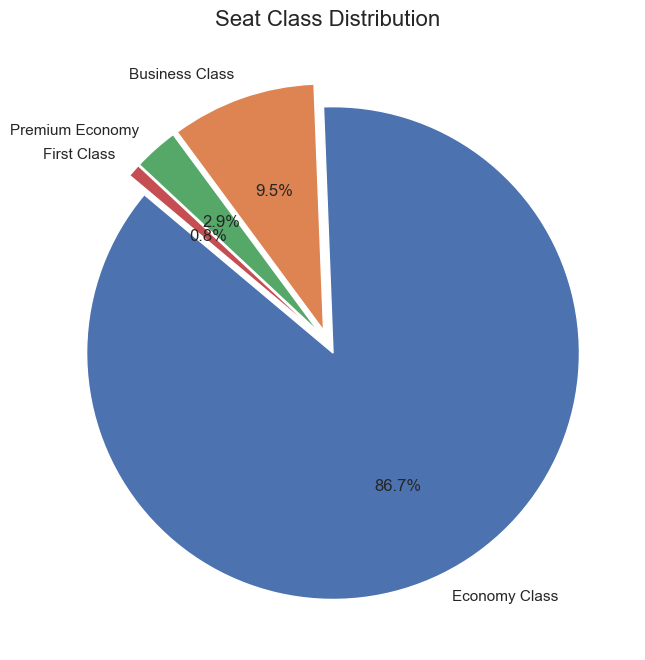

In [9]:
# PIE CHART (Seat class distribution)
plt.figure(figsize=(8,8))

counts = review_df["Seat Type"].value_counts()
explode = [0.05] * len(counts)   # small lift → 3D effect

counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,             
    startangle=140,
)

plt.title("Seat Class Distribution", fontsize=16)
plt.ylabel("")
plt.show()


### 🔹Insights
The pie chart shows which seat classes passengers use most, with one class clearly dominating, indicating it is the most commonly chosen travel option among reviewers.

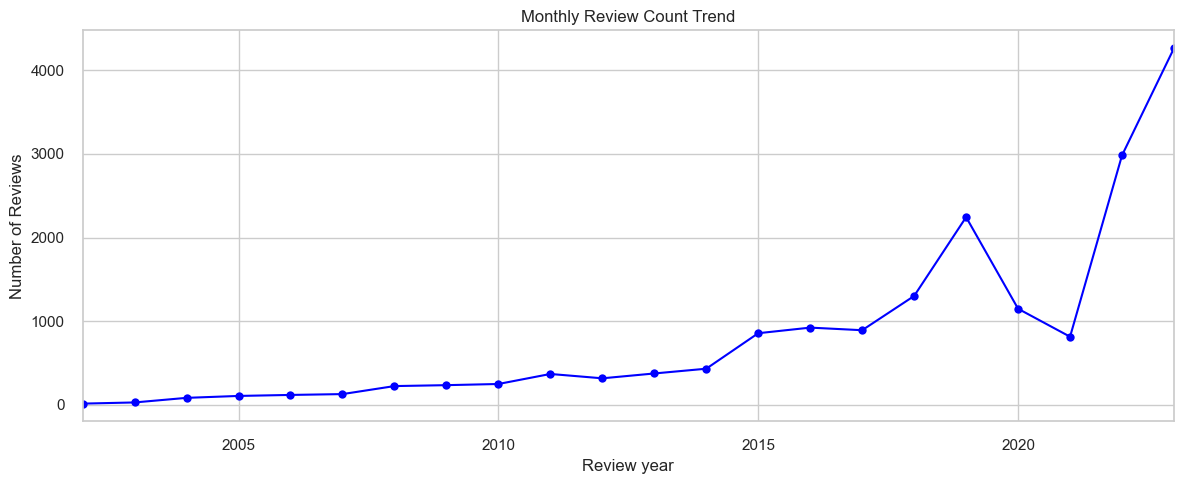

In [3]:
# Line plot

review_df['Review Date'] = pd.to_datetime(review_df['Review Date'], errors='coerce', dayfirst=True)

monthly = review_df.groupby(review_df['Review Date'].dt.to_period('Y')).size()

plt.figure(figsize=(12,5))
monthly.plot(kind='line', marker='o',color='Blue')
plt.title("Monthly Review Count Trend")
plt.xlabel("Review year")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

### 🔹Insights
The line plot shows how the number of airline reviews changes year by year. Peaks indicate years with higher passenger activity or more users sharing feedback, while dips show periods with fewer reviews. Overall, it highlights the trend of how customer engagement with airline reviews has changed over time.

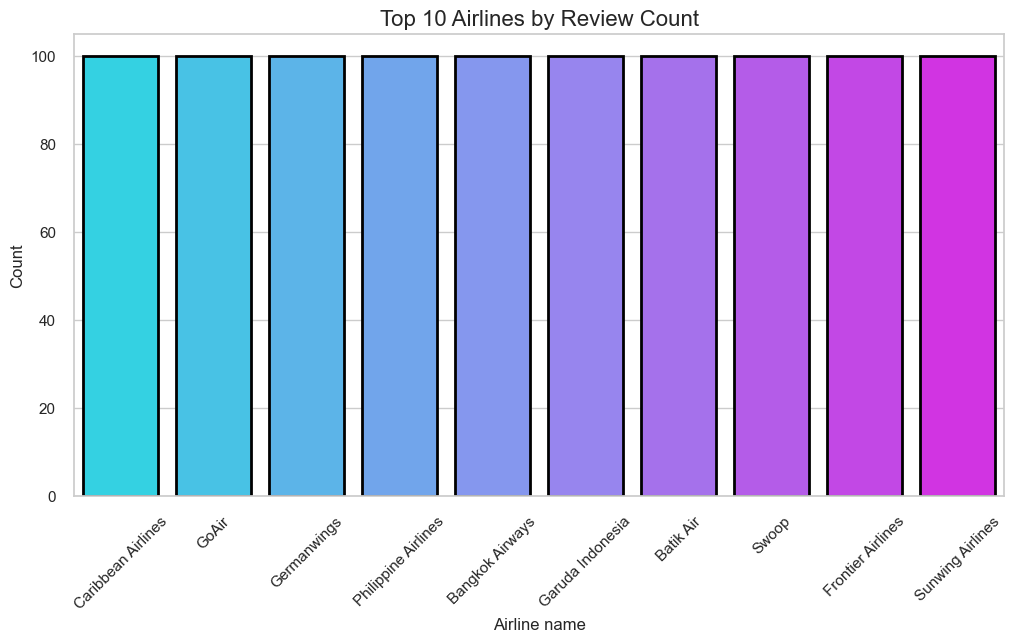

In [4]:
# BARPLOT( show only top 10 Airlines)

top10 = (review_df['Airline Name'].value_counts().head(10) .reset_index())
top10.columns = ['Airline Name','Count']
plt.figure(figsize=(12,6))

# Shadow layer (behind → looks 3D)
sns.barplot(data=top10, x='Airline Name', y='Count',
            color='gray', alpha=0.4)

# Main bar (on top → raised effect)
sns.barplot(data=top10, x='Airline Name', y='Count',
            palette='cool', edgecolor='black', linewidth=2)

plt.xticks(rotation=45)
plt.title("Top 10 Airlines by Review Count", fontsize=16)
plt.xlabel("Airline name")
plt.ylabel("Count")

plt.show()

### 🔹 Insights
Passengers generally give moderate to high ratings, and satisfaction mainly depends on seat comfort, cabin staff, food, and entertainment quality. Airlines with more reviews are simply more popular, not always better. Travelers who recommend an airline usually give higher ratings, showing that better service directly increases overall satisfaction

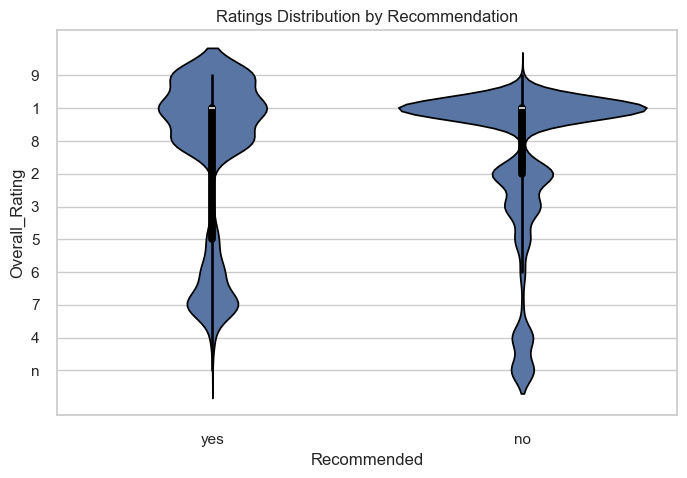

In [11]:
# VIOLIN PLOT

plt.figure(figsize=(8,5))
sns.violinplot(data=review_df, x="Recommended", y="Overall_Rating", edgecolor="black")
plt.title("Ratings Distribution by Recommendation")
plt.show()


### 🔹Insights

Recommendation is highly correlated with the overall rating.
For “Yes”: wider at high ratings

For “No”: wider at low ratings

Happy customers (high scores) are far more likely to recommend the airline.

Low-rated experiences rarely lead to recommendations.

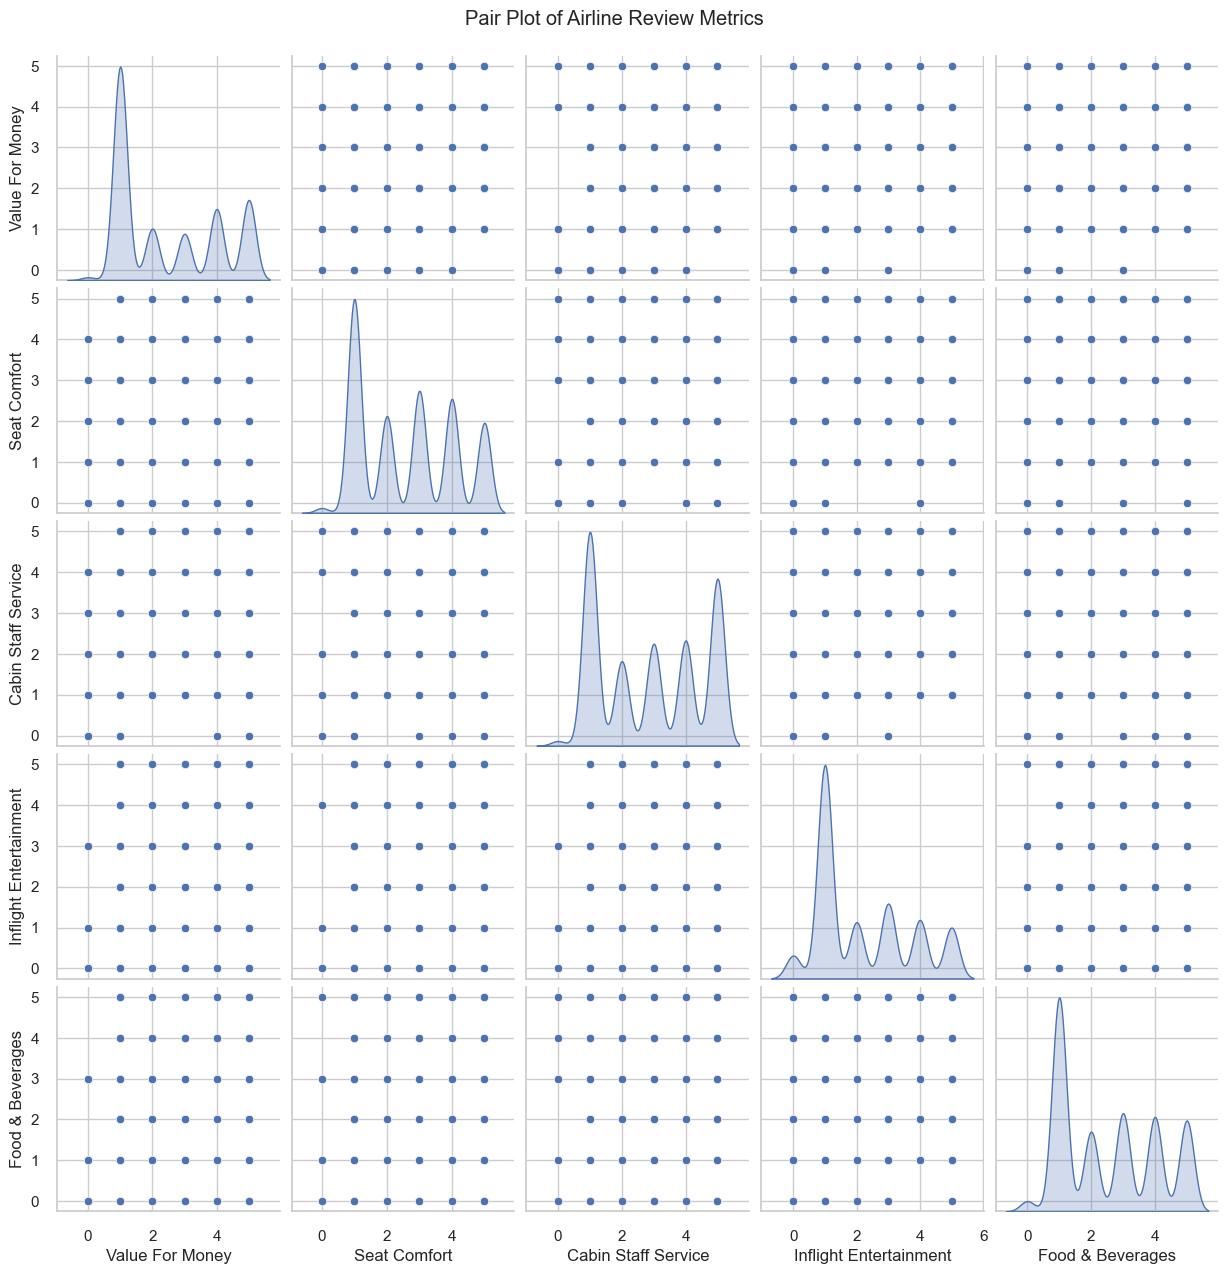

In [7]:
# PAIRPLOT

sns.pairplot(review_df[[
    "Overall_Rating",
    "Value For Money",
    "Seat Comfort",
    "Cabin Staff Service",
    "Inflight Entertainment",
    "Food & Beverages"
]], diag_kind="kde")
plt.suptitle("Pair Plot of Airline Review Metrics", y=1.02)
plt.show()

### 🔹 Insights
Passengers who had a comfortable seat usually also gave higher scores for food, staff service, and entertainment.

Airline review metrics are interconnected, showing a unified perception of service quality.

This helps identify which areas influence overall satisfaction and how improvements in one area may positively affect others.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🌟 KEY SUMMARY OF THE PROJECT
</h2>



### Objective

The project analyzes airline customer reviews to understand service quality, traveler preferences, rating patterns, and factors influencing overall satisfaction.


### Dataset Highlights:

Columns include Airline Name, Traveller Type, Seat Type, Ratings (food, comfort, wifi, entertainment), Comments, and Dates.
Data cleaning involved converting date formats, handling missing values, and fixing numeric rating conversions.


### Key Findings:

- Certain airlines receive significantly more reviews, indicating higher popularity or visibility.
- Traveller types such as Couple Leisure, Solo Leisure, and Family Leisure show distinct satisfaction levels.
- Seat Types (Economy, Premium Economy, Business) have visible differences in rating patterns.
- Service-specific ratings (food, entertainment, cleanliness, WiFi) directly influence overall satisfaction.
- Pie charts, countplots, barplots, scatter plots, and violin plots were used to visualize patterns.


### Sentiment & Rating Trends:

- Positive reviews correlate strongly with high scores in Seat Comfort and Value for Money.
- Negative reviews often mention delays, rude staff, poor WiFi quality, and uncomfortable seating.



<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
📌 CONCLUSION
</h2>

The analysis shows that service quality consistency is the most important factor influencing customer satisfaction.

Business and Premium Economy passengers express higher satisfaction compared to Economy travelers.

Airlines with better on-board experience (cleanliness, comfort, entertainment) receive the highest ratings.

WiFi quality remains one of the weakest areas in many airlines and greatly impacts review sentiment.


<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🏆 RECOMMENDATION
</h2>

- Improve WiFi Connectivity
   - WiFi is one of the most frequently mentioned negative aspects. Strengthening onboard internet quality can drastically improve reviews.


- Focus on Seat Comfort in Economy Class
   - Most low ratings come from Economy passengers. Improving legroom and cushioning may enhance satisfaction scores.


- Enhance Value-for-Money Services
  - Provide small perks, better meal quality, or entertainment options for lower-cost tickets.


- Staff Training
   - Friendly and supportive cabin crew repeatedly appear in positive reviews. Regular training should be enhanced.


- Monitor Feedback by Traveller Type
   - Leisure travelers prefer comfort & cleanliness.
   - Business travelers care about efficiency & WiFi.
   - Tailored improvements can help target specific groups.


<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
⚠ Limitations of the Project
</h2>

- Limited Textual Sentiment Analysis
    - Only numeric ratings were analyzed; full natural language sentiment analysis of comments was not used.

- Imbalanced Data
    - Some airlines have many reviews; others have very few → may bias the analysis.

- Missing Values
    - Some columns (e.g., WiFi, food) contained missing ratings, reducing accuracy.


- No Real-time Data
    - The dataset is static and may not represent recent airline service changes.


<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🚀 Future Work
</h2>

- Predictive Modeling
   - Build Machine Learning models to predict overall ratings based on service-specific features.
   - Identify which variables most strongly influence satisfaction.

- Time-Series Trend Analysis
   - Analyze airline ratings over months/years to understand service improvement or decline.

- Interactive Dashboard (Power BI / Tableau / Plotly Dash)
   - Create a real-time visualization dashboard for airline management usage.

- Deep-dive by Seat Class
  - Compare satisfaction for Economy vs Business vs Premium Economy using more advanced statistical analysis.


